# Audio Analysis Library for Brain Battle

This module is used to analyse the audio from the videos uploaded, and find the time differences between these videos so that they can be synchronized with ease.

We use Scipy's correlate() method to compare two audios extracted from the videos, and then find the delay of the second video.

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from moviepy import VideoFileClip, AudioFileClip

In [10]:
# Load video1
video1 = AudioFileClip(r"C:\Users\enesy\Documents\Brain Battle 25 applications\brain_battle_recording_1.wav")

# Extract audio as a numpy array from the video.
audio1 = video1.to_soundarray().T

audio1

array([[-0.00479126, -0.00460815, -0.00411987, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00479126, -0.00460815, -0.00411987, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
# Load video2
video2 = AudioFileClip(r"C:\Users\enesy\Documents\Brain Battle 25 applications\brain_battle_recording_2.wav")

# Extract audio as a numpy array from the video.
audio2 = video2.to_soundarray().T

audio2

array([[ 4.91333008e-03,  4.08935547e-03,  9.15527344e-05, ...,
         1.46484375e-03,  4.57763672e-04, -1.52587891e-04],
       [ 4.91333008e-03,  4.08935547e-03,  9.15527344e-05, ...,
         1.46484375e-03,  4.57763672e-04, -1.52587891e-04]])

In [12]:
video1.fps

44100

In [20]:
from scipy.io import wavfile

sample_rate_1, audio1_scipy = wavfile.read(r"C:\Users\enesy\Documents\Brain Battle 25 applications\brain_battle_recording_1.wav")
sample_rate_2, audio2_scipy = wavfile.read(r"C:\Users\enesy\Documents\Brain Battle 25 applications\brain_battle_recording_2.wav")
audio1_scipy

array([-223, -213, -196, ..., -110,  -39,    9], dtype=int16)

In [15]:
# Trying to use SCIPY to correlate two audio files with each other.

from scipy import signal

audio1_scipy = np.float32(audio1_scipy)
audio2_scipy = np.float32(audio2_scipy)

# The method paramater does not matter much here.
# fft is faster than the default.
corr = signal.correlate(audio1_scipy, audio2_scipy, mode="same", method="fft")

# correlation_lags method creates an array
# that contains the possible delays according to each correlation
# Its kind of like dark magic ngl.
lags = signal.correlation_lags(len(audio1_scipy), len(audio2_scipy), mode="same")

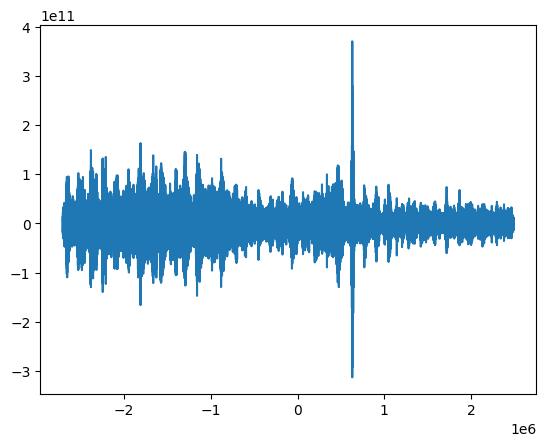

In [16]:
# Plot the cross-correlation against the delays (delays are in terms of samples per second.)
plt.plot(lags, corr)
plt.show()

In [19]:
# The maximum correlation happens at the amount the second video is delayed compared to the first.
max_corr = np.argmax(corr)
print(max_corr)

# We divide the lag by the samples per second (44100 for a normal WAV file)
# to find the amount "the second video" is delayed compared to the first.
# Essentially convert the number from samples into seconds.
time_delay = lags[max_corr] / sample_rate_1

print(f"The amount of seconds the 2nd video is delayed is: {time_delay} sec")


3339257
The amount of seconds the 2nd video is delayed is: 13.157791666666666 sec


Next

https://stackoverflow.com/questions/33383650/using-cross-correlation-to-detect-an-audio-signal-within-another-signal

cross correlation to find where audio matches.